In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix

In [ ]:
!pip install wordninja
import wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('URL Classification.csv',names=["","url","cat"])


In [ ]:
df.drop("",axis=1,inplace=True)
df

,url,cat
0,http://www.liquidgeneration.com/,Adult
1,http://www.onlineanime.org/,Adult
2,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
3,http://www.galeon.com/kmh/,Adult
4,http://www.fanworkrecs.com/,Adult
...,...,...
1562973,http://www.maxpreps.com/,Sports
1562974,http://www.myscore.com/,Sports
1562975,http://sportsillustrated.cnn.com/highschool,Sports
1562976,http://rss.cnn.com/rss/si_highschool?format=xml,Sports


In [ ]:
cat=df.cat.unique()
cat

array(['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health',
       'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science',
       'Shopping', 'Society', 'Sports'], dtype=object)

In [ ]:
cat_dict=dict(zip(cat,range(len(cat))))
print(cat_dict)
df['cat'].replace(cat_dict,inplace=True)

{'Adult': 0, 'Arts': 1, 'Business': 2, 'Computers': 3, 'Games': 4, 'Health': 5, 'Home': 6, 'Kids': 7, 'News': 8, 'Recreation': 9, 'Reference': 10, 'Science': 11, 'Shopping': 12, 'Society': 13, 'Sports': 14}


In [ ]:
df

,url,cat
0,http://www.liquidgeneration.com/,0
1,http://www.onlineanime.org/,0
2,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,0
3,http://www.galeon.com/kmh/,0
4,http://www.fanworkrecs.com/,0
...,...,...
1562973,http://www.maxpreps.com/,14
1562974,http://www.myscore.com/,14
1562975,http://sportsillustrated.cnn.com/highschool,14
1562976,http://rss.cnn.com/rss/si_highschool?format=xml,14


Text(0, 0.5, 'Total Number Of Individual Category for Training')

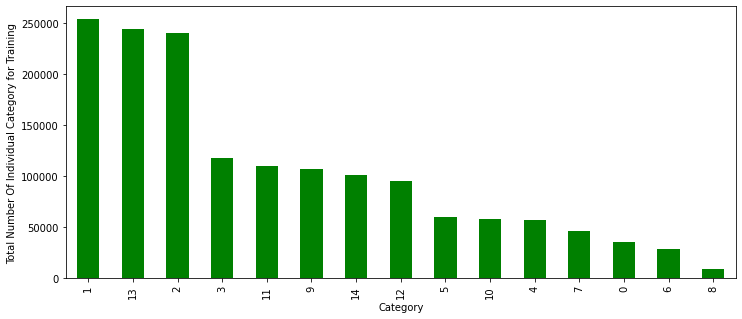

In [ ]:
df.cat.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Training')

In [ ]:
#temp=df
#df=temp

In [ ]:
df["url"].drop_duplicates(keep='first', inplace=True)

In [ ]:
df

,url,cat
0,http://www.liquidgeneration.com/,0
1,http://www.onlineanime.org/,0
2,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,0
3,http://www.galeon.com/kmh/,0
4,http://www.fanworkrecs.com/,0
...,...,...
1562973,http://www.maxpreps.com/,14
1562974,http://www.myscore.com/,14
1562975,http://sportsillustrated.cnn.com/highschool,14
1562976,http://rss.cnn.com/rss/si_highschool?format=xml,14


In [ ]:
size=df[df["cat"]==8].shape[0]
print(size)

8989


In [ ]:
df_new=pd.DataFrame()
for x in range(len(cat)):
  t=df[df["cat"]==x][:size]
  #print(t)
  df_new=df_new.append(t)

In [ ]:
df=df_new
df

,url,cat
0,http://www.liquidgeneration.com/,0
1,http://www.onlineanime.org/,0
2,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,0
3,http://www.galeon.com/kmh/,0
4,http://www.fanworkrecs.com/,0
...,...,...
1470634,http://www.hfcc.edu/campus_life/athletics/wome...,14
1470635,http://athletics.iwcc.cc.ia.us/wbasketball/,14
1470636,http://www.icc.edu/athletics/basketballw/,14
1470637,http://www.ivcc.edu/athletics/womensbasketball...,14


Text(0, 0.5, 'Total Number Of Individual Category for Testing')

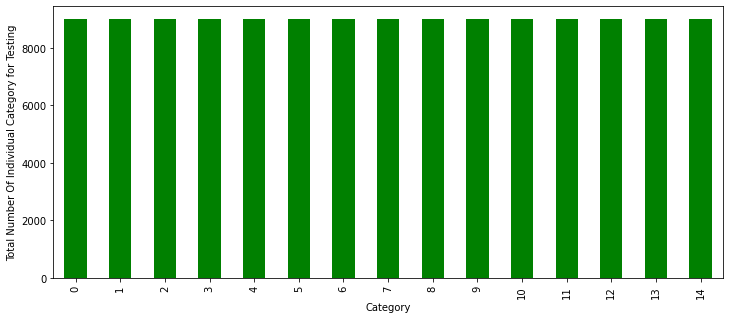

In [ ]:
df.cat.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Testing')

In [ ]:
from urllib.parse import urlparse

def fun(url):
    """Get the host name from the url"""
    uri = urlparse(url)
    mixDomain=uri.netloc
    domain=mixDomain.split(".")[1]
    domain=wordninja.split(domain)
    domain=" ".join(domain)
    #print(domain)
    mixPath=uri.path
    if(mixPath==""):
      return domain
    else:
      path=wordninja.split(mixPath)
      path=" ".join(path)
      #print(path)
      return f"{domain}/{path}"
    

In [ ]:
df['url']=df['url'].apply(fun)

In [ ]:
df=df.sample(frac=1)

In [ ]:
df

,url,cat
3174,sepp of vienna/,0
1462449,cv bb a/,14
843353,whitsunday times/,8
1222988,sbc global/asl clay,13
650960,funhouse amusements,4
...,...,...
1014329,complete putting greens,11
1470396,strictly shooting hoops,14
39992,armchair empire/anime reviews infinite ry vi u...,1
291486,jennifer thiem e,2


In [ ]:
div=int(df.shape[0]*.8)
print(div)

107868


In [ ]:

X_train=df['url'][:div]
y_train=df['cat'][:div]
X_train.shape

(107868,)

In [ ]:
X_test=df['url'][div:]
y_test=df['cat'][div:]
X_test.shape

(26967,)

In [ ]:
print(X_train)

3174                sepp of vienna/
1462449                    cv bb a/
843353            whitsunday times/
1222988         sbc global/asl clay
650960          funhouse amusements
                     ...           
703833                       a aap/
1463324    ship/baseball index html
956449                      tripod/
40499                  anime naruto
767938                smart balance
Name: url, Length: 107868, dtype: object


In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train) 

In [ ]:
y_pred=text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1744
           1       0.52      0.78      0.62      1795
           2       0.51      0.49      0.50      1735
           3       0.55      0.53      0.54      1844
           4       0.61      0.50      0.55      1839
           5       0.67      0.55      0.60      1870
           6       0.72      0.78      0.75      1864
           7       0.77      0.73      0.75      1827
           8       0.63      0.57      0.60      1783
           9       0.59      0.55      0.57      1778
          10       0.55      0.54      0.54      1750
          11       0.57      0.59      0.58      1788
          12       0.49      0.57      0.53      1759
          13       0.49      0.41      0.45      1762
          14       0.75      0.78      0.77      1829

    accuracy                           0.60     26967
   macro avg       0.61      0.60      0.60     26967
weighted avg       0.61   

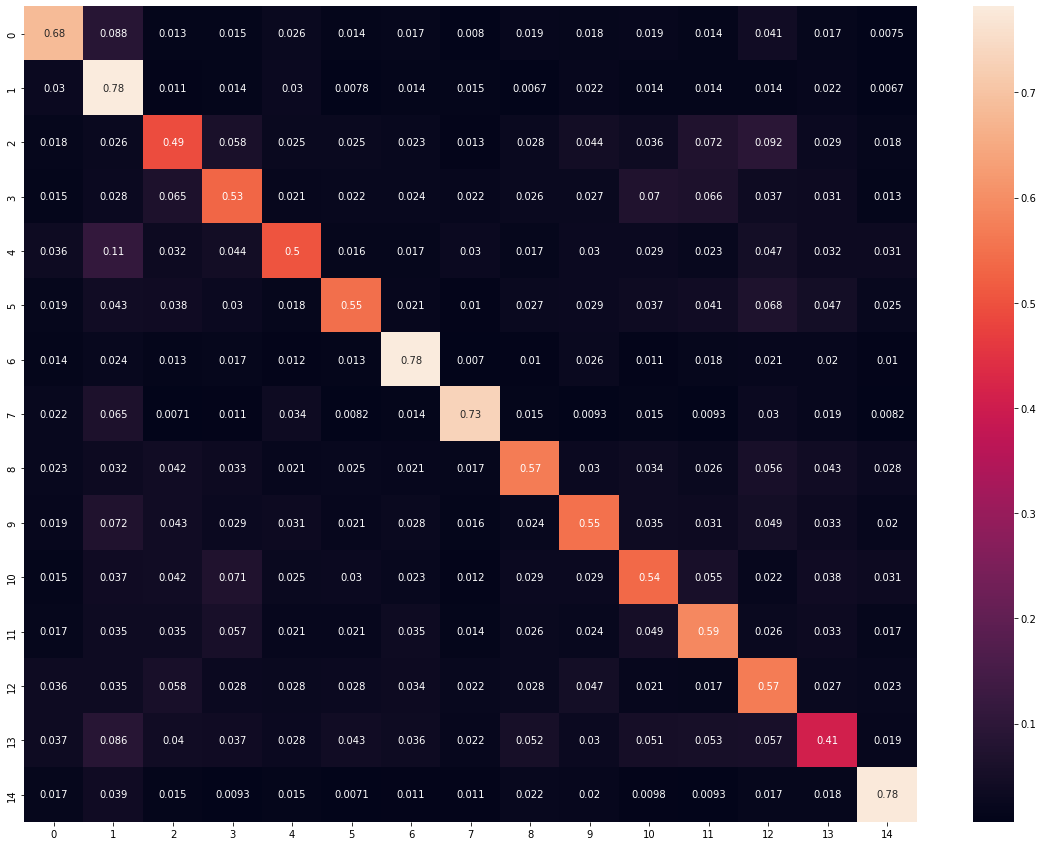

In [ ]:
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in range(len(cat))],
                  columns = [i for i in range(len(cat))])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [ ]:
print('Overall model Accuracy = ', accuracy_score(y_train,text_clf.predict(X_train)))
#print('Naive Bayes Test Accuracy = ', accuracy_score(y_test_correct,gs_clf.predict(X_test_correct))) 

Overall model Accuracy =  0.7202784885230096


In [42]:
url=input("Enter url to test: ")
url=fun(url)
print(text_clf.predict([url]))

Enter url to test: https://www.pornudeo.com/en/?utm_campaign=pornmate&utm_medium=traffic&utm_source=pornmate
[0]


In [ ]:
import pickle

In [ ]:
pickle.dump(text_clf,open("nb_url_clf.pkl",'wb'))